In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',200)

In [2]:
train = pd.read_csv('train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
test = pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [4]:
test['SalePrice']=np.repeat(train['SalePrice'].mean(),test.shape[0])

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## First lets handle Numerical Variables

In [6]:
train.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

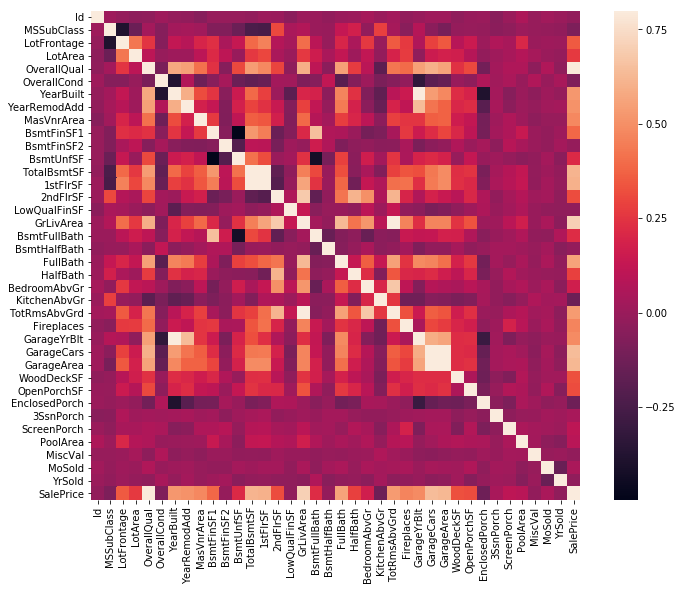

In [7]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### We will pick top 10 features

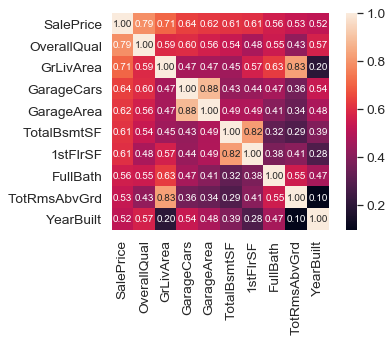

In [8]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

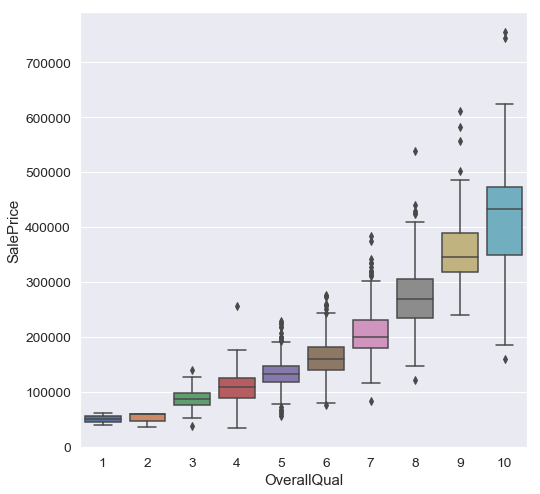

In [9]:
data=pd.concat([train['SalePrice'],train['OverallQual']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="OverallQual",y="SalePrice",data=data)

### As expected SalePrice should increase as OverallQual increases, so, we can say that isn't the possibility of outliers


Text(0, 0.5, 'SalePrice')

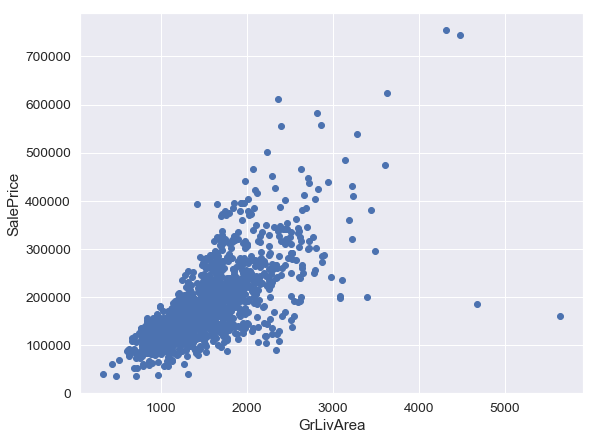

In [10]:
plt.subplots(figsize=(9,7))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### People will pay more for more living area, therefore there are two outliers in the lower right part of the scatter plot

In [11]:
train = train.drop(train[(train['SalePrice']<200000) & (train['GrLivArea']>4000)].index).reset_index(drop=True)

Text(0, 0.5, 'SalePrice')

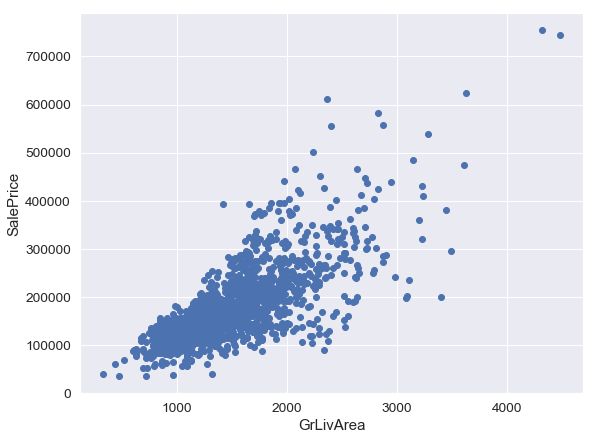

In [12]:
plt.subplots(figsize=(9,7))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

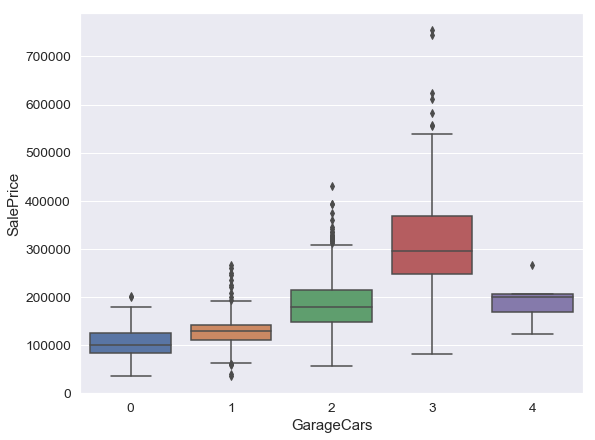

In [13]:
data=pd.concat([train['SalePrice'],train['GarageCars']],axis=1)
f,ax=plt.subplots(figsize=(9,7))
sns.boxplot(x="GarageCars",y="SalePrice",data=data)

### As the number of cars that can be parked in the garage increases the price should increase but for 4 cars its not the case.

In [14]:
train=train.drop(train[train['GarageCars']==4].index).reset_index(drop=True)

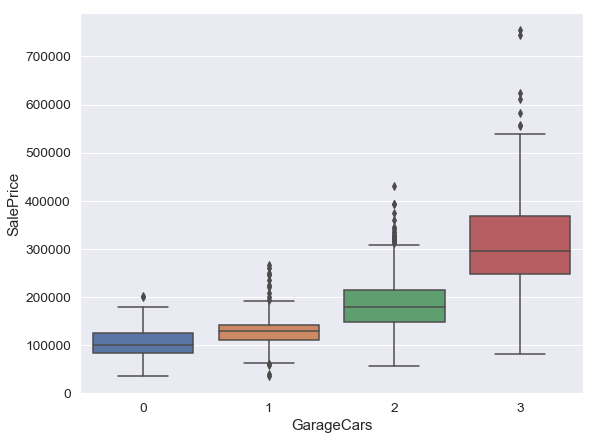

In [15]:
data=pd.concat([train['SalePrice'],train['GarageCars']],axis=1)
f,ax=plt.subplots(figsize=(9,7))
sns.boxplot(x="GarageCars",y="SalePrice",data=data)

Text(0, 0.5, 'SalePrice')

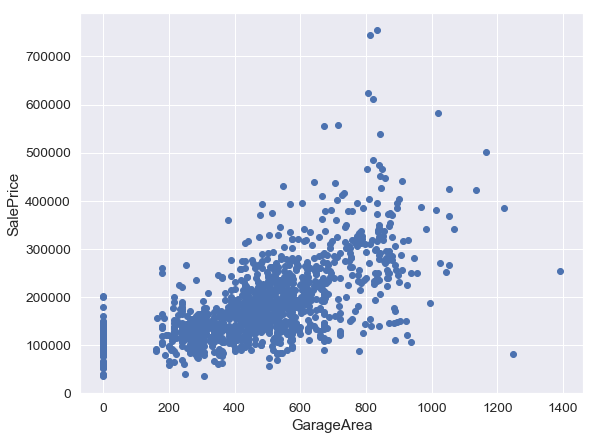

In [16]:
plt.subplots(figsize=(9,7))
plt.scatter(train['GarageArea'],train['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

### Two outliers on the bottom right

In [17]:
train = train.drop(train[(train['SalePrice']<300000) & (train['GarageArea']>1200)].index).reset_index(drop=True)

Text(0, 0.5, 'SalePrice')

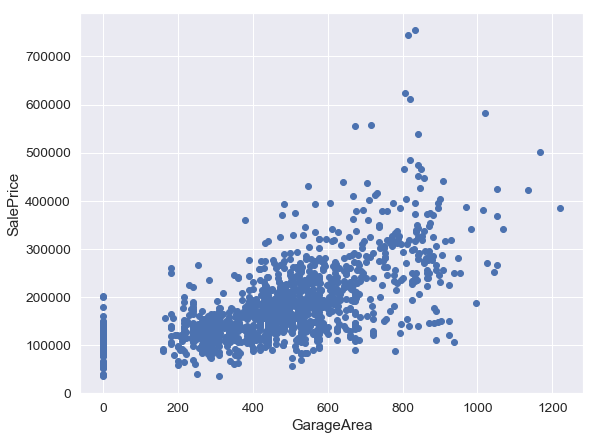

In [18]:
plt.subplots(figsize=(9,7))
plt.scatter(train['GarageArea'],train['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

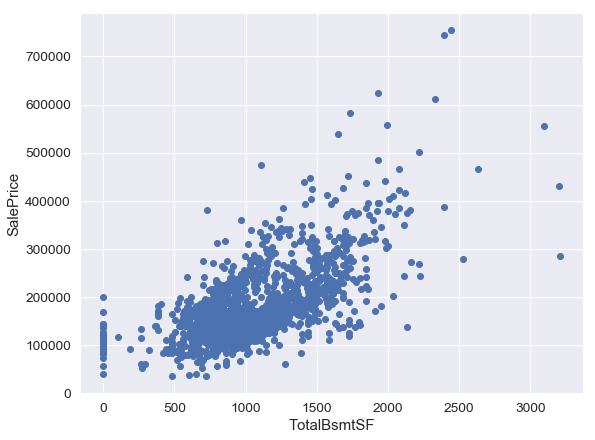

In [19]:
plt.subplots(figsize=(9,7))
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

In [20]:
train = train.drop(train[(train['SalePrice']<400000) & (train['TotalBsmtSF']>3000)].index).reset_index(drop=True)

Text(0, 0.5, 'SalePrice')

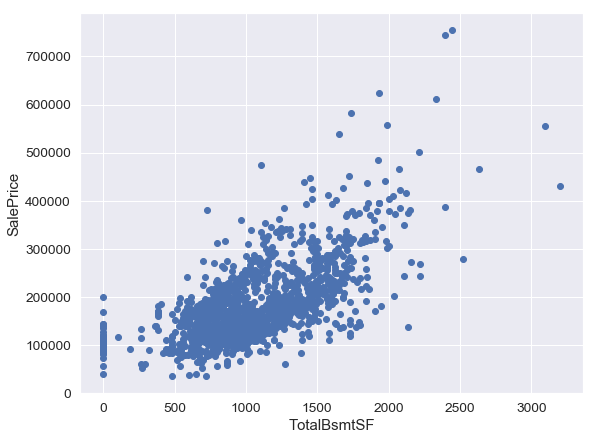

In [21]:
# one outlier removed
plt.subplots(figsize=(9,7))
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

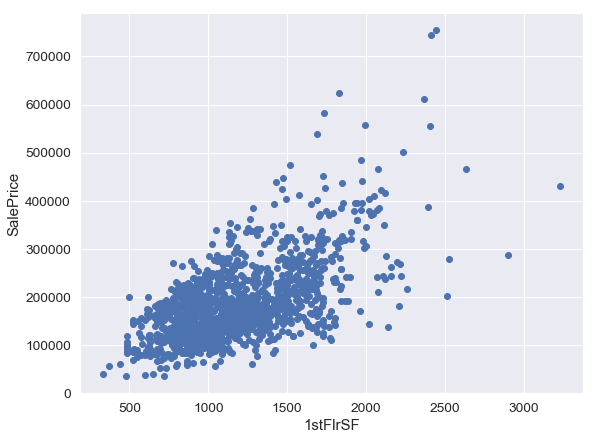

In [22]:
plt.subplots(figsize=(9,7))
plt.scatter(train['1stFlrSF'],train['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

### Looks fine, moving on

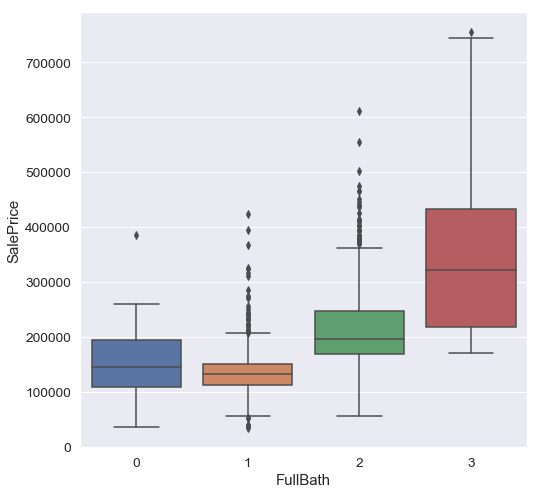

In [23]:
data=pd.concat([train['SalePrice'],train['FullBath']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="FullBath",y="SalePrice",data=data)

### Seems okay, moving on

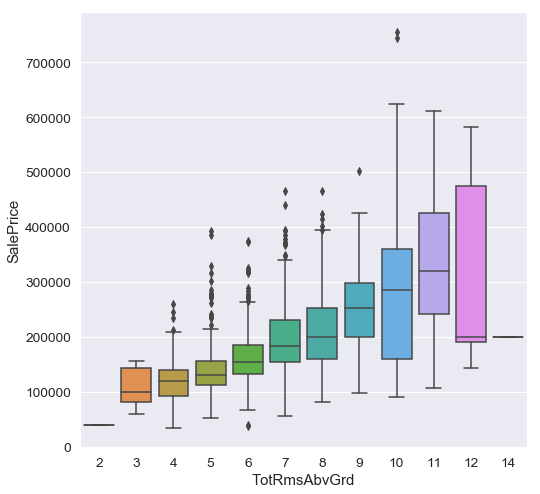

In [24]:
data=pd.concat([train['SalePrice'],train['TotRmsAbvGrd']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=data)

In [25]:
# dropping the last boxplot
train=train.drop(train[(train['TotRmsAbvGrd']==14)].index).reset_index(drop=True)

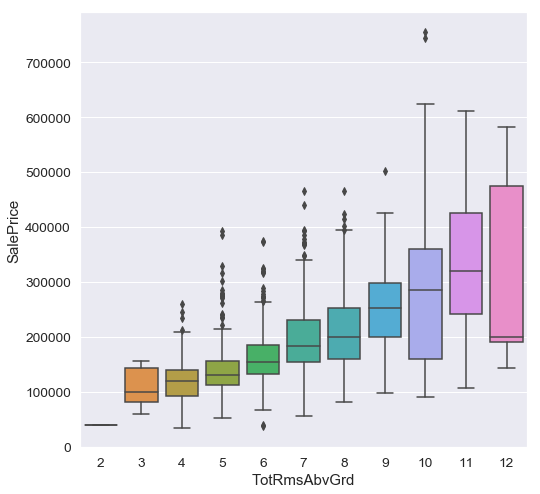

In [26]:
data=pd.concat([train['SalePrice'],train['TotRmsAbvGrd']],axis=1)
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(x="TotRmsAbvGrd",y="SalePrice",data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

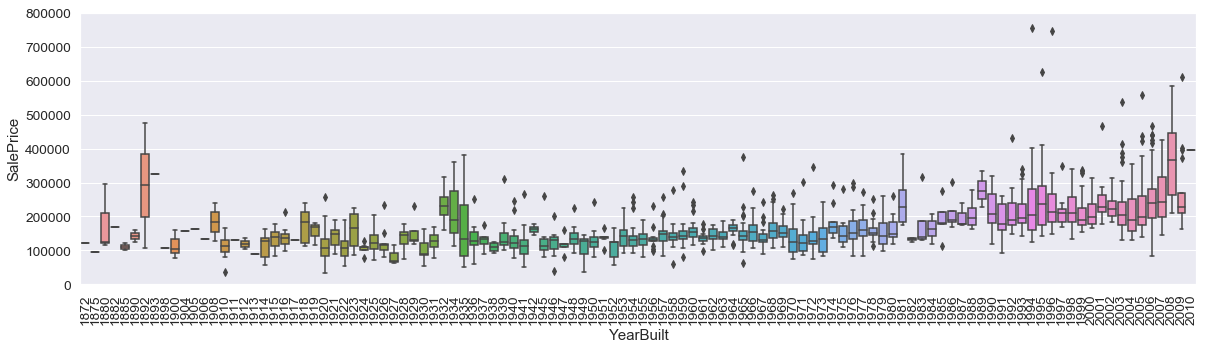

In [27]:
data=pd.concat([train['SalePrice'],train['YearBuilt']],axis=1)
f,ax=plt.subplots(figsize=(20,5))
fig=sns.boxplot(x="YearBuilt",y="SalePrice",data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

### High irregularity can be expected due to other features so lets move on

### Now lets handle missing data

In [89]:
train['Train']=np.repeat(True,train.shape[0])
test['Train']=np.repeat(False,test.shape[0])
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2903  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2904  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2905  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2906  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2907  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2903         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2904         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2905         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2906         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2907         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2903       Norm    Twnhs     2Story            4            7       1970   
2904       Norm   TwnhsE     2Story            4            5       1970   
2905       Norm     1Fam     1Story            5            7       1960   
2906       Norm     1Fam     SFoyer            5            5       1992   
2907       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2903          1970     Gable  CompShg     CemntBd     CmentBd       None   
2904          1970     Gable  CompShg     CemntBd     CmentBd       None   
2905          1996     Gable  CompShg     VinylSd     VinylSd       None   
2906          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2907          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2903         0.0        TA        TA     CBlock       TA       TA   
2904         0.0        TA        TA     CBlock       TA       TA   
2905         0.0        TA        TA     CBlock       TA       TA   
2906         0.0        TA        TA      PConc       Gd       TA   
2907        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
2903           No          Unf         0.0          Unf         0.0   
2904           No          Rec       252.0          Unf         0.0   
2905           No          ALQ      1224.0          Unf         0.0   
2906           Av          GLQ       337.0          Unf         0.0   
2907           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
2903      546.0        546.0    GasA        Gd          Y      SBrkr   
2904      294.0        546.0    GasA        TA          Y      SBrkr   
2905        0.0       1224.0    GasA        Ex          Y      SBrkr   
2906      575.0        912.0    GasA        TA          Y      SBrkr   
2907      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
2903       546       546             0       1092           0.0           0.0   
2904       546       546             0       1092           0.0           0.0   
2905      1224         0             0       1224           1.0           0.0   
2906       970         0             0        970           0.0           1.0   
2907       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
2903         1         1             3             1          TA   
2904         1         1             3             1          TA   
2905         1         0             4             1          TA   
2906         1         0             3             1          TA   
2907         2         1             3             1          TA   

   

In [90]:
# no need for Id feature
all_data.drop('Id',axis='columns',inplace=True)

In [91]:
all_data.isnull().any()

MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1        True
BsmtFinType2      True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

In [92]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Utilities"] = all_data["Utilities"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [93]:
all_data.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF   

In [94]:
all_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Lets convert categorical data to integer or float

In [95]:
all_data.LotShape=all_data.LotShape.map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})
all_data.Utilities=all_data.Utilities.map({'None':0,'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})
all_data.LandSlope=all_data.LandSlope.map({'Sev':1,'Mod':2,'Gtl':3})
all_data.ExterQual=all_data.ExterQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.ExterCond=all_data.ExterCond.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.HeatingQC=all_data.HeatingQC.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.CentralAir=all_data.CentralAir.map({'N':0,'Y':1})
all_data.KitchenQual=all_data.KitchenQual.map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.Functional=all_data.Functional.map({'Sal':1,'Sev':2,'Maj1':3,'Maj2':4,'Mod':5,'Min1':6,'Min2':7,'Typ':8})
all_data.PavedDrive=all_data.PavedDrive.map({'N':0,'P':1,'Y':2})
all_data.BsmtQual=all_data.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.BsmtCond=all_data.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.BsmtExposure=all_data.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
all_data.BsmtFinType1=all_data.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
all_data.BsmtFinType2=all_data.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
all_data.FireplaceQu=all_data.FireplaceQu.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.GarageFinish=all_data.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})
all_data.GarageQual=all_data.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.GarageCond=all_data.GarageCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
all_data.PoolQC=all_data.PoolQC.map({'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [96]:
obj=all_data.select_dtypes(include=['object']).columns
obj

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 'Electrical', 'GarageType', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [97]:
dummy=pd.get_dummies(all_data[obj])
dummy.shape

(2908, 171)

In [98]:
all_data.drop(labels=obj,axis='columns',inplace=True)
all_data.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [99]:
all_data=pd.concat((all_data,dummy),axis=1)
print(all_data.shape)
all_data.tail()

(2908, 229)


MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
2903         160         21.0     1936         4          4          3   
2904         160         21.0     1894         4          4          3   
2905          20        160.0    20000         4          4          3   
2906          85         62.0    10441         4          4          3   
2907          60         74.0     9627         4          4          2   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
2903            4            7       1970          1970         0.0   
2904            4            5       1970          1970         0.0   
2905            5            7       1960          1996         0.0   
2906            5            5       1992          1992         0.0   
2907            7            5       1993          1994        94.0   

      ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
2903          3          3         3         3             1             1   
2904          3          3         3         3             1             3   
2905          3          3         3         3             1             5   
2906          3          3         4         3             3             6   
2907          3          3         4         3             3             2   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
2903         0.0             1         0.0      546.0        546.0          4   
2904       252.0             1         0.0      294.0        546.0          3   
2905      1224.0             1         0.0        0.0       1224.0          5   
2906       337.0             1         0.0      575.0        912.0          3   
2907       758.0             1         0.0      238.0        996.0          5   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
2903           1       546       546             0       1092           0.0   
2904           1       546       546             0       1092           0.0   
2905           1      1224         0             0       1224           1.0   
2906           1       970         0             0        970           0.0   
2907           1       996      1004             0       2000           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
2903           0.0         1         1             3             1   
2904           0.0         1         1             3             1   
2905           0.0         1         0             4             1   
2906           1.0         1         0             3             1   
2907           0.0         2         1             3             1   

      KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
2903            3             5           8           0            0   
2904            3             6           8           0            0   
2905            3             7           8           1            3   
2906            3             6           8           0            0   
2907            3             9           8           1            3   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
2903          0.0             0         0.0         0.0           0   
2904       1970.0             1         1.0       286.0           3   
2905       1960.0             1         2.0       576.0           3   
2906          0.0             0         0.0         0.0           0   
2907       1993.0             3         3.0       650.0           3   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
2903           0           2           0            0              0   
2904           3           2           0           24              0   
2905           3           2         474            0              0   
2906           0           2          80           32              0   
2907           3           2         190           48         

In [100]:
Xtrain=all_data[all_data.Train]
Xtrain

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0             60         65.0     8450         4          4          3   
1             20         80.0     9600         4          4          3   
2             60         68.0    11250         3          4          3   
3             70         60.0     9550         3          4          3   
4             60         84.0    14260         3          4          3   
5             50         85.0    14115         3          4          3   
6             20         75.0    10084         4          4          3   
7             60         80.0    10382         3          4          3   
8             50         51.0     6120         4          4          3   
9            190         50.0     7420         4          4          3   
10            20         70.0    11200         4          4          3   
11            60         85.0    11924         3          4          3   
12            20         72.0    12968         2          4          3   
13            20         91.0    10652         3          4          3   
14            20         73.0    10920         3          4          3   
15            45         51.0     6120         4          4          3   
16            20         73.0    11241         3          4          3   
17            90         72.0    10791         4          4          3   
18            20         66.0    13695         4          4          3   
19            20         70.0     7560         4          4          3   
20            60        101.0    14215         3          4          3   
21            45         57.0     7449         4          4          3   
22            20         75.0     9742         4          4          3   
23           120         44.0     4224         4          4          3   
24            20         72.0     8246         3          4          3   
25            20        110.0    14230         4          4          3   
26            20         60.0     7200         4          4          3   
27            20         98.0    11478         4          4          3   
28            20         47.0    16321         3          4          3   
29            30         60.0     6324         3          4          3   
30            70         50.0     8500         4          4          3   
31            20         72.0     8544         3          4          3   
32            20         85.0    11049         4          4          3   
33            20         70.0    10552         3          4          3   
34           120         60.0     7313         4          4          3   
35            60        108.0    13418         4          4          3   
36            20        112.0    10859         4          4          3   
37            20         74.0     8532         4          4          3   
38            20         68.0     7922         4          4          3   
39            90         65.0     6040         4          4          3   
40            20         84.0     8658         4          4          3   
41            20        115.0    16905         4          4          3   
42            85         67.0     9180         3          4          3   
43            20         70.0     9200         3          4          3   
44            20         70.0     7945         4          4          3   
45           120         61.0     7658         4          4          3   
46            50         48.0    12822         3          4          3   
47            20         84.0    11096         4          4          3   
48           190         33.0     4456         4          4          3   
49            20         66.0     7742         4          4          3   
...          ...          ...      ...       ...        ...        ...   
1399          60         79.0    12420         4          4          3   
1400          50         80.0     9600         4          4          3   
1401      

In [101]:
Ytrain=Xtrain.SalePrice

In [102]:
Xtrain=Xtrain.drop(labels=['SalePrice','Train'],axis='columns')
Xtrain

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0             60         65.0     8450         4          4          3   
1             20         80.0     9600         4          4          3   
2             60         68.0    11250         3          4          3   
3             70         60.0     9550         3          4          3   
4             60         84.0    14260         3          4          3   
5             50         85.0    14115         3          4          3   
6             20         75.0    10084         4          4          3   
7             60         80.0    10382         3          4          3   
8             50         51.0     6120         4          4          3   
9            190         50.0     7420         4          4          3   
10            20         70.0    11200         4          4          3   
11            60         85.0    11924         3          4          3   
12            20         72.0    12968         2          4          3   
13            20         91.0    10652         3          4          3   
14            20         73.0    10920         3          4          3   
15            45         51.0     6120         4          4          3   
16            20         73.0    11241         3          4          3   
17            90         72.0    10791         4          4          3   
18            20         66.0    13695         4          4          3   
19            20         70.0     7560         4          4          3   
20            60        101.0    14215         3          4          3   
21            45         57.0     7449         4          4          3   
22            20         75.0     9742         4          4          3   
23           120         44.0     4224         4          4          3   
24            20         72.0     8246         3          4          3   
25            20        110.0    14230         4          4          3   
26            20         60.0     7200         4          4          3   
27            20         98.0    11478         4          4          3   
28            20         47.0    16321         3          4          3   
29            30         60.0     6324         3          4          3   
30            70         50.0     8500         4          4          3   
31            20         72.0     8544         3          4          3   
32            20         85.0    11049         4          4          3   
33            20         70.0    10552         3          4          3   
34           120         60.0     7313         4          4          3   
35            60        108.0    13418         4          4          3   
36            20        112.0    10859         4          4          3   
37            20         74.0     8532         4          4          3   
38            20         68.0     7922         4          4          3   
39            90         65.0     6040         4          4          3   
40            20         84.0     8658         4          4          3   
41            20        115.0    16905         4          4          3   
42            85         67.0     9180         3          4          3   
43            20         70.0     9200         3          4          3   
44            20         70.0     7945         4          4          3   
45           120         61.0     7658         4          4          3   
46            50         48.0    12822         3          4          3   
47            20         84.0    11096         4          4          3   
48           190         33.0     4456         4          4          3   
49            20         66.0     7742         4          4          3   
...          ...          ...      ...       ...        ...        ...   
1399          60         79.0    12420         4          4          3   
1400          50         80.0     9600         4          4          3   
1401      

In [103]:
Xtest=all_data[~all_data.Train]
Xtest

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
1449          20         80.0    11622         4          4          3   
1450          20         81.0    14267         3          4          3   
1451          60         74.0    13830         3          4          3   
1452          60         78.0     9978         3          4          3   
1453         120         43.0     5005         3          4          3   
1454          60         75.0    10000         3          4          3   
1455          20         64.0     7980         3          4          3   
1456          60         63.0     8402         3          4          3   
1457          20         85.0    10176         4          4          3   
1458          20         70.0     8400         4          4          3   
1459         120         26.0     5858         3          4          3   
1460         160         21.0     1680         4          4          3   
1461         160         21.0     1680         4          4          3   
1462         160         24.0     2280         4          4          3   
1463         120         24.0     2280         4          4          3   
1464          60        102.0    12858         3          4          3   
1465          20         94.0    12883         3          4          3   
1466          20         90.0    11520         4          4          3   
1467          20         79.0    14122         3          4          3   
1468          20        110.0    14300         4          4          2   
1469          60        105.0    13650         4          4          3   
1470         120         41.0     7132         3          4          3   
1471          20        100.0    18494         3          4          3   
1472         120         43.0     3203         4          4          3   
1473          80         67.0    13300         3          4          3   
1474          60         63.0     8577         3          4          3   
1475          60         60.0    17433         2          4          3   
1476          20         73.0     8987         4          4          3   
1477          20         92.0     9215         4          4          3   
1478          20         84.0    10440         4          4          3   
1479          60         70.0    11920         4          4          3   
1480          30         70.0     9800         4          4          3   
1481          20         39.0    15410         3          4          3   
1482          60         85.0    13143         3          4          3   
1483          60         88.0    11134         4          4          3   
1484         120         25.0     4835         3          4          3   
1485         160         39.0     3515         4          4          3   
1486         160         30.0     3215         4          4          3   
1487         160         24.0     2544         4          4          3   
1488         160         24.0     2544         4          4          3   
1489         160         72.5     2980         4          4          3   
1490         160         72.5     2403         3          4          3   
1491          20         57.0    12853         3          4          3   
1492          60         68.0     7379         3          4          3   
1493          20         80.0     8000         4          4          3   
1494          20         80.0    10456         3          4          3   
1495          60         80.0    10791         4          4          3   
1496          50         80.0    18837         3          4          3   
1497          60         80.0     9600         4          4          3   
1498          20         80.0     9600         4          4          3   
...          ...          ...      ...       ...        ...        ...   
2858          20         60.0    16012         3          4          3   
2859          50         45.0     8248         4          4          3   
2860      

In [104]:
Xtest=Xtest.drop(labels=['SalePrice','Train'],axis='columns')
Xtest.reset_index()
Xtest.shape

(1459, 227)

In [107]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
Xtrain_std = stdsc.fit_transform(Xtrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
Xtest_std=stdsc.fit_transform(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)



 mu = 180827.21 and sigma = 79549.59



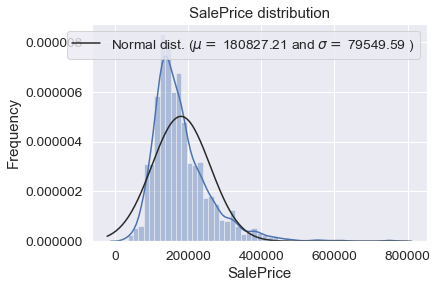

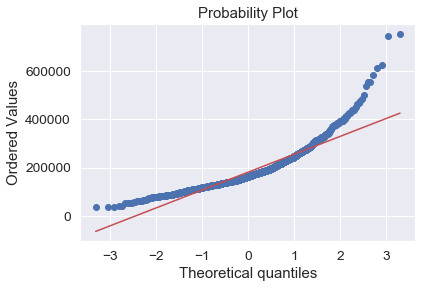

Skewness: 1.889882
Kurtosis: 6.547840


In [109]:
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
# Plot Histogram
sns.distplot(Ytrain , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Ytrain)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(Ytrain, plot=plt)
plt.show()

print("Skewness: %f" % Ytrain.skew())
print("Kurtosis: %f" % Ytrain.kurt())

### Lets fix the curve by taking a log


 mu = 12.02 and sigma = 0.40



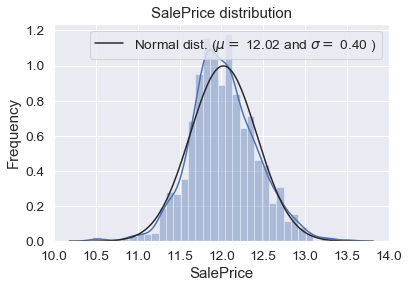

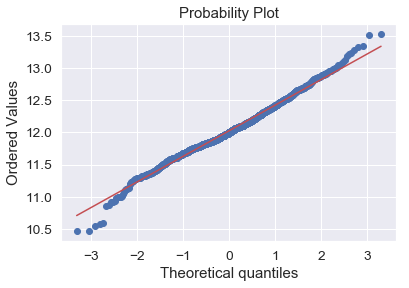

Skewness: 0.127984
Kurtosis: 0.816152


In [110]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Ytrain = np.log1p(Ytrain)

#Check the new distribution 
sns.distplot(Ytrain , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Ytrain)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(Ytrain, plot=plt)
plt.show()

print("Skewness: %f" % Ytrain.skew())
print("Kurtosis: %f" % Ytrain.kurt())

In [111]:
# Hold out method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.15, random_state=1)

In [112]:
# Linear Regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
y_hat= regr.predict(X_test)

In [114]:
rss=np.mean((y_hat - y_test) ** 2)
print("Residual sum of squares: %.2f" %rss )
print("RMSE: ",np.sqrt(rss))

Residual sum of squares: 0.02
RMSE:  0.14007063292452973


In [115]:
# Using the model on test.csv data
Y=regr.predict(Xtest)

In [116]:
Y

array([11.66897272, 12.026509  , 12.08052777, ..., 12.06857065,
       11.64475161, 12.29813779])

In [117]:
test['SalePrice']=np.expm1(Y)

In [118]:
test.SalePrice

0       116887.143663
1       167125.952867
2       176402.236135
3       198996.180352
4       204593.286403
5       170369.168205
6       177901.522543
7       163124.358425
8       188928.632105
9       115515.047917
10      181802.733826
11       98831.870704
12       96801.421937
13      149215.173564
14      116931.530961
15      369225.709824
16      257517.802004
17      275889.240582
18      280301.220933
19      519038.949372
20      334661.649332
21      210031.714319
22      176094.420912
23      165047.316722
24      181695.259737
25      194960.852772
26      329720.675159
27      224764.849535
28      192811.119725
29      237859.719433
30      195395.734904
31       96752.438249
32      164140.834824
33      287303.668418
34      278908.492344
35      231814.958356
36      182581.927113
37      185840.848644
38      166779.953334
39      157607.255746
40      179507.503459
41      151327.722515
42      292587.920378
43      244368.060278
44      228973.488987
45      19

In [120]:
test=test.drop('Train',axis='columns')

# Final Predicted Prices

In [122]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
30    1491          60       RL         70.0    11920   Pave   NaN      Reg   
31    1492          30       RH         70.0     9800   Pave   NaN      Reg   
32    1493          20       RL         39.0    15410   Pave   NaN      IR1   
33    1494          60       RL         85.0    13143   Pave   NaN      IR1   
34    1495          60       RL         88.0    11134   Pave   NaN      Reg   
35    1496         120       FV         25.0     4835   Pave   NaN      IR1   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave   NaN      IR1   
44    1505          20       FV         80.0     8000   Pave   NaN      Reg   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
46    1507          60       RL         80.0    10791   Pave   NaN      Reg   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
48    1509          60       RL         80.0     9600   Pave   NaN      Reg   
49    1510          20       RL         80.0     9600   Pa